# reddit-api

Use the "Run" button to execute the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
CLIENT_ID = "GeSccL-Puw4cfJbPrqTMqA"
SECRET_KEY = "2C4HbdwiAdpB0l9foC7sIUMUyrECbA"

In [ ]:
import praw

In [ ]:
r= praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    password="Chickenreddit1",
    user_agent="testscript by u/TrainingAlarmed2851",
    username="TrainingAlarmed2851",
)

In [ ]:
subreddit = reddit.subreddit('CryptoCurrency')
hot_crypto_news = subreddit.hot(limit=5)
for post in hot_crypto_news:
  print(dir(post))

NameError: ignored

In [ ]:
for post in reddit.subreddit("CryptoCurrency").hot(limit=25):
    print(post.id)

In [ ]:
#comments = post.comments.list() #list takes top level comments and lists them, then the next level and lists all the comments of the same level
#for comment in comments:
  #print('-')
  #print(post.title)
  #print('Parent ID: ',comment.parent_id)
  #print('Comment ID: ',comment.id)
  #print(comment.body) # currently printing out several of the comments in each post. There may be several comments under 1 post
  #if len(comment.replies) > 0: # under a comment, there can exist a reply
    #for reply in comment.replies: #there could be replies upon replies so look into that
      #print('Reply: ', reply.body)

In [ ]:
#post.comments.replace_more(limit=0)    #Currently not displaying effect in this subreddit. What this does is if there are too many comments
#for comment in post.comments.list():   #to load in a section, it will be hidden. Using replace_more, we can display them
 # print('-')
  #print('Parent ID: ',comment.parent_id)
  #print('Comment ID: ',comment.id)
  #print(comment.body)
  #if len(comment.replies) > 0:
  #  for reply in comment.replies:
  #    print('Reply: ', reply.body)

In [ ]:
# Look for a way to properly rebuild the reddit data. Parent ID -> Parent comment -> all replies -> repeat

# PSAW

In [ ]:
from psaw import PushshiftAPI

api = PushshiftAPI(r)

In [ ]:
import datetime as dt

start_epoch=int(dt.datetime(2017, 1, 1).timestamp())

list(api.search_submissions(after=start_epoch,
                            subreddit='CryptoCurrency',
                            filter=['url','author', 'title', 'subreddit','selftext'],
                            limit=100))


#collecting data like this is not feasible. Therefore, only collect data that is highly upvoted or has parameters that make it highly influential to the crypto market
#Use these posts and comments with these factors to reduce number of data. Create a model that can evaluate a sentiment based on context and words in posts and comments
#perhaps it can analyze sentiment based of words used. Test the model to see if it actually works by seeing if a post really caused market movement.
#Use this model so that our model can take in live posts and comments and analyze the context and words. Based of these words, etc, assign a sentiment value

Add more filters for the code above. Then you take the post ids and pass them to praw

# Pushshift

## Get Posts from Crypto Subreddits

In [ ]:
import time

def get_crypto_posts(**kwargs):
    r = requests.get("https://api.pushshift.io/reddit/submission/search/",params=kwargs)
    data = r.json()
    return data['data']

before = None
while True:
    comments = get_crypto_posts(q = 'bitcoin' and 'btc', size=500,after = '1y',before='30d',sort='asc',sort_type='created_utc')
    if not comments: break

    for comment in comments:
        before = comment['created_utc'] # This will keep track of your position for the next call in the while loop
        # Do stuff with each comment object
        # Example (print comment id, epoch time of comment and subreddit and score)
        print(comment['id'],comment['created_utc'],comment['subreddit'],comment['score'])


    time.sleep(1)

In [ ]:
#link_id of a post. shows comments under that post through the body

#comments = api.search_comments(link_id='t3_mw29qr', limit=100)

import time

def get_crypto_posts(**kwargs):
    r = requests.get("https://api.pushshift.io/reddit/search/submission/?num_comments>=200&score>=1000",params=kwargs)
    data = r.json()
    return data['data']

while True:
    comments = get_crypto_posts(q = 'bitcoin' and 'btc',after = '1y',before='30d',sort='asc',sort_type='created_utc')
    if not comments: break

    for comment in comments:
        before = comment['created_utc'] # This will keep track of your position for the next call in the while loop
        # Do stuff with each comment object
        # Example (print comment id, epoch time of comment and subreddit and score)
        print(comment['id'],comment['created_utc'],comment['subreddit'],comment['score'])
    time.sleep(1)

#add field and increase num_comments and score to see this runs faster

In [ ]:
from pmaw import PushshiftAPI
api = PushshiftAPI()

In [ ]:
import datetime as dt
before = int(dt.datetime(2021,12,1,0,0).timestamp())
after = int(dt.datetime(2021,1,1,0,0).timestamp())

In [ ]:
#subreddit = 'binance,CoinBase,ledgerwallet,defi,CryptoMarkets,CryptoCurrencyTrading,Crypto_General,blockchain,CryptoCurrencies,altcoin,icocrypto,ico'
subreddit = 'Bitcoin, BitcoinBeginners,BitcoinMarkets, BitcoinDiscussion, Jobs4Bitcoin'
comments = api.search_submissions(q = 'bitcoin' and 'btc', before=before, after=after, subreddit = subreddit)
print(f'Retrieved {len(comments)} comments from Pushshift')
#restrict to two months

INFO:pmaw.PushshiftAPIBase:20733 result(s) available in Pushshift
INFO:pmaw.PushshiftAPIBase:Checkpoint:: Success Rate: 100.00% - Requests: 100 - Batches: 10 - Items Remaining: 10787
INFO:pmaw.PushshiftAPIBase:Checkpoint:: Success Rate: 100.00% - Requests: 200 - Batches: 20 - Items Remaining: 2421
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 99.60% - Requests: 252 - Batches: 26 - Items Remaining: 23
INFO:pmaw.PushshiftAPIBase:23 result(s) not found in Pushshift
Retrieved 20710 comments from Pushshift


In [ ]:
df = pd.DataFrame(comments)

df

all_awardings  allow_live_comments  ... link_flair_css_class top_awarded_type
0                []                False  ...                  NaN              NaN
1                []                False  ...                  NaN              NaN
2                []                False  ...                  NaN              NaN
3                []                False  ...                  NaN              NaN
4                []                False  ...                  NaN              NaN
...             ...                  ...  ...                  ...              ...
20705            []                False  ...                  NaN              NaN
20706            []                False  ...                  NaN              NaN
20707            []                False  ...                  NaN              NaN
20708            []                False  ...                  NaN              NaN
20709            []                False  ...                  NaN              NaN

[20710 rows x 85 columns]

In [ ]:
import praw
reddit= praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    password="Chickenreddit1",
    user_agent="testscript by u/TrainingAlarmed2851",
    username="TrainingAlarmed2851",
)

ids = []
for id in df['id']:
  id = 't3_' + id
  ids.append(id)
ids

#create a list of the submission ids and add 't3_' in front of all the ids. For loop through the list
#and get the score of each id and store the results in a list. Convert the list of scores into a pd series
#Append series to df

['t3_m0mbrr',
 't3_m0m59p',
 't3_m0m30m',
 't3_m0lv9x',
 't3_m0luad',
 't3_m0lsvc',
 't3_m0lhex',
 't3_m0lau3',
 't3_m0kwvu',
 't3_m0kwdk',
 't3_m0ksn6',
 't3_m0k0j0',
 't3_m0jv2e',
 't3_m0jj5k',
 't3_m0jesj',
 't3_m0j2lb',
 't3_m0j0zq',
 't3_m0iyyj',
 't3_m0inwr',
 't3_m0imni',
 't3_m0i8op',
 't3_m0i339',
 't3_m0i1d7',
 't3_m0hu3e',
 't3_m05tey',
 't3_m05rm6',
 't3_m05n0p',
 't3_m05jj3',
 't3_m05igr',
 't3_m05hxo',
 't3_m04pvx',
 't3_m03j9w',
 't3_m03f9d',
 't3_m03b7y',
 't3_m0374y',
 't3_m035qx',
 't3_lzuhai',
 't3_lzud27',
 't3_lztrlg',
 't3_lztre1',
 't3_lztox9',
 't3_lztg84',
 't3_lzt2ug',
 't3_lzsxxr',
 't3_lzsoj2',
 't3_lzsnpj',
 't3_lzsf1v',
 't3_lzrrs3',
 't3_lzril6',
 't3_ly9htf',
 't3_ly7g9l',
 't3_ly6rt8',
 't3_ly65fs',
 't3_ly64uv',
 't3_ly60cb',
 't3_ly5r8n',
 't3_ly5at8',
 't3_ly5ac0',
 't3_ly558j',
 't3_ly4hxl',
 't3_ly2u82',
 't3_ly2n69',
 't3_ly2fnz',
 't3_ly2ez0',
 't3_ly26nq',
 't3_ly1m73',
 't3_ly1739',
 't3_ly1107',
 't3_lxzwux',
 't3_lxzh9b',
 't3_lxzfmz',
 't3_l

In [ ]:
scores = []
ids2 = []
for submission in reddit.info(ids):
	ids2.append(submission.id)
	scores.append(submission.score)
scores

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

[2,
 1,
 1,
 68,
 1,
 0,
 1,
 0,
 3,
 0,
 71,
 77,
 1,
 4,
 0,
 0,
 6,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 7,
 10,
 1,
 13,
 2,
 1,
 23,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 4,
 0,
 13,
 1932,
 0,
 6,
 0,
 3,
 1,
 36,
 1,
 1,
 2,
 1,
 0,
 7,
 64,
 2,
 4,
 0,
 0,
 1,
 4,
 16,
 7,
 0,
 1,
 322,
 2,
 1,
 2,
 1546,
 7,
 1,
 1,
 0,
 0,
 1,
 11,
 0,
 1,
 4,
 10,
 1,
 21,
 1,
 1,
 13,
 354,
 6,
 3,
 1,
 0,
 4,
 0,
 2,
 1,
 1,
 12,
 55,
 1,
 1,
 2,
 2,
 1,
 81,
 3,
 69,
 3,
 1,
 1,
 1,
 31,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 5,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 32,
 12,
 3,
 2,
 2,
 1,
 1,
 24,
 104,
 7,
 3,
 0,
 308,
 5,
 5,
 6,
 0,
 1,
 1,
 1,
 1,
 108,
 42,
 3,
 16,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 36,
 0,
 1,
 1,
 0,
 103,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 0,
 2,
 11,
 18,
 29,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 5,
 0,
 2,
 3,
 1,
 1,
 0,
 13,
 1,
 0,
 2,
 0,
 0,
 24,
 2,
 1,
 1,
 2,
 1,


In [ ]:
df = df[df['id'].isin(ids2)]
df


all_awardings  allow_live_comments  ... link_flair_css_class top_awarded_type
0                []                False  ...                  NaN              NaN
1                []                False  ...                  NaN              NaN
2                []                False  ...                  NaN              NaN
3                []                False  ...                  NaN              NaN
4                []                False  ...                  NaN              NaN
...             ...                  ...  ...                  ...              ...
20705            []                False  ...                  NaN              NaN
20706            []                False  ...                  NaN              NaN
20707            []                False  ...                  NaN              NaN
20708            []                False  ...                  NaN              NaN
20709            []                False  ...                  NaN              NaN

[20710 rows x 85 columns]

In [ ]:
len(scores) #why is length of scores not equal to length of ids? May be fixable by limiting by subreddit

20710

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
title_df = df['title']#[(df['num_comments'] > 0) & ~(df['title'].str.contains('[H]'))]
selftext_df = df['title'][df['selftext'].index.isin(title_df.index)]
timestamp_df = df['created_utc'][df['selftext'].index.isin(title_df.index)]
scores_title = [n['compound'] for n in title_df.apply(vader.polarity_scores).tolist()]
scores_selftext = [n['compound'] for n in selftext_df.apply(vader.polarity_scores).tolist()]

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
score_df = pd.DataFrame(data = {'#title': scores_title, '#selftext': scores_selftext, 'timestamp': timestamp_df})
score_df['s-score'] = (score_df['#title']+score_df['#selftext'])/2
score_df['timestamp'] = score_df['timestamp']*1000
score_df.drop(['#title', '#selftext'], inplace = True, axis = 1)
score_df = score_df.sort_values(by='timestamp')
score_df = score_df.reset_index(drop=True)
score_df

timestamp  s-score
0      1609459378000   0.0000
1      1609459667000   0.0000
2      1609459935000   0.7835
3      1609460696000   0.0000
4      1609460892000   0.0000
...              ...      ...
20705  1638308067000   0.0000
20706  1638308444000   0.0000
20707  1638309229000   0.6369
20708  1638313767000   0.2732
20709  1638316536000  -0.3400

[20710 rows x 2 columns]

In [ ]:
score_df['demand'] = score_df['s-score'].mul(scores)
score_df

timestamp  s-score  demand
0      1609459378000   0.0000  0.0000
1      1609459667000   0.0000  0.0000
2      1609459935000   0.7835  0.7835
3      1609460696000   0.0000  0.0000
4      1609460892000   0.0000  0.0000
...              ...      ...     ...
20705  1638308067000   0.0000  0.0000
20706  1638308444000   0.0000  0.0000
20707  1638309229000   0.6369  0.0000
20708  1638313767000   0.2732  0.0000
20709  1638316536000  -0.3400 -0.0000

[20710 rows x 3 columns]

In [ ]:
from binance.client import Client
from datetime import timedelta
import copy

client = Client('', '')
ticker = 'BTC'
numeric_columns = ['Open','High','Low','Close','Volume','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume']
#Repeat steps from above for kline test data
klines_test = client.get_historical_klines(f"{ticker}USDT", Client.KLINE_INTERVAL_15MINUTE, str(int(score_df['timestamp'].iloc[0])), str(int(score_df['timestamp'].iloc[-1])))
kline_test_df = pd.DataFrame(klines_test)
kline_test_df.columns = ['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore']
kline_test_df.dropna(inplace=True)
kline_test_close_time = kline_test_df['Close time']
kline_test_df.drop(['Ignore'], inplace=True, axis=1)
kline_test_df[numeric_columns] = kline_test_df[numeric_columns].apply(pd.to_numeric,axis=1)

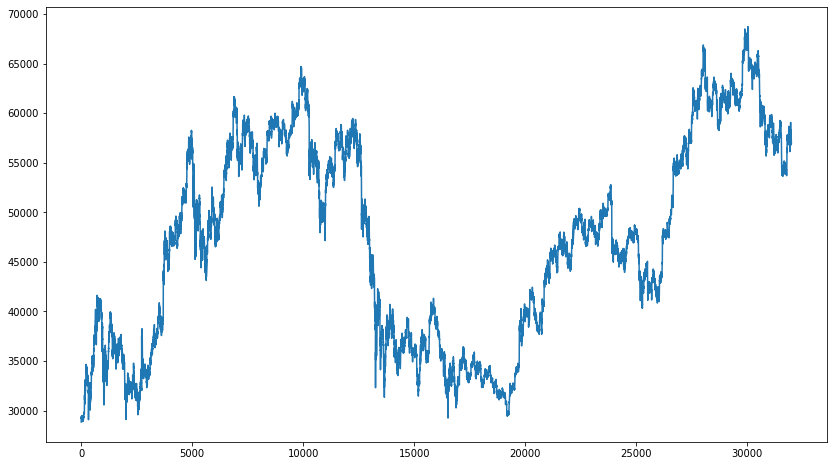

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(kline_test_df['Close'])

In [ ]:
mark = score_df[(score_df['demand']<-50)]
mark

timestamp  s-score    demand
629    1609837263000  -0.3595  -64.7100
672    1609870821000  -0.6486 -197.1744
919    1610001491000  -0.2960 -154.2160
991    1610038859000  -0.4404 -318.8496
1120   1610091411000  -0.4939 -309.1814
...              ...      ...       ...
20492  1637872675000  -0.2960  -56.5360
20528  1637946596000  -0.3182  -69.0494
20592  1638067406000  -0.2960  -84.6560
20626  1638145257000  -0.9118 -101.2098
20663  1638218361000  -0.4939  -90.3837

[117 rows x 3 columns]

In [ ]:
#df.iloc[(df['num']-input).abs().argsort()[:2]]
best_idx = []
min_idx = 0
min = 9999999999
for i,j in mark.iterrows():
  for a,b in kline_test_df.iterrows():
    if abs((j['timestamp'] - b['Close time'])) < min:
      min = abs((j['timestamp'] - b['Close time']))
      min_idx = a
  best_idx.append(min_idx)
  min=9999999999
  min_idx=0

In [ ]:
best_idx

[418,
 455,
 601,
 642,
 700,
 1031,
 1034,
 1112,
 1210,
 1249,
 1300,
 1333,
 1351,
 1406,
 1449,
 1585,
 1715,
 1740,
 1762,
 2005,
 2005,
 2077,
 2284,
 2341,
 2574,
 2615,
 2675,
 3089,
 3740,
 3950,
 4201,
 4681,
 4955,
 4965,
 4969,
 5064,
 5171,
 5207,
 5521,
 6389,
 6664,
 6667,
 6800,
 6890,
 7040,
 7064,
 7074,
 8988,
 9138,
 9420,
 9929,
 10323,
 10459,
 10591,
 10740,
 10854,
 11669,
 11854,
 12883,
 12996,
 13035,
 13055,
 13177,
 13228,
 13571,
 13590,
 13735,
 13993,
 14023,
 14163,
 14290,
 14396,
 14747,
 14773,
 15027,
 15128,
 15216,
 15370,
 15692,
 16372,
 16403,
 16510,
 16964,
 17526,
 17843,
 17859,
 17871,
 18029,
 18714,
 19824,
 20574,
 21514,
 22052,
 22409,
 22779,
 22864,
 23757,
 24214,
 24277,
 25243,
 26018,
 26313,
 27136,
 27923,
 28729,
 28808,
 29668,
 30266,
 30303,
 30641,
 30851,
 30929,
 31504,
 31586,
 31720,
 31806,
 31888]

In [ ]:
mark1 = mark.reset_index(drop=True)
mark1

timestamp  s-score    demand
0    1609837263000  -0.3595  -64.7100
1    1609870821000  -0.6486 -197.1744
2    1610001491000  -0.2960 -154.2160
3    1610038859000  -0.4404 -318.8496
4    1610091411000  -0.4939 -309.1814
..             ...      ...       ...
112  1637872675000  -0.2960  -56.5360
113  1637946596000  -0.3182  -69.0494
114  1638067406000  -0.2960  -84.6560
115  1638145257000  -0.9118 -101.2098
116  1638218361000  -0.4939  -90.3837

[117 rows x 3 columns]

In [ ]:
minmax=[]
counter=0
for i in best_idx:
  if (mark1['demand'][counter] - kline_test_df['Volume'][i] < 500) & (mark1['demand'][counter] - kline_test_df['Volume'][i] > -500):
    minmax.append(i)
  counter+=1

In [ ]:
#print(kline_test_df['Close time'][381])
#print(mark['timestamp'][221])

- Play around with this.
- Change up the 'demand' condition
- Collect more pushshift data
- Add more subreddits
- Test different coins
- Look for 'change in demand and volume'

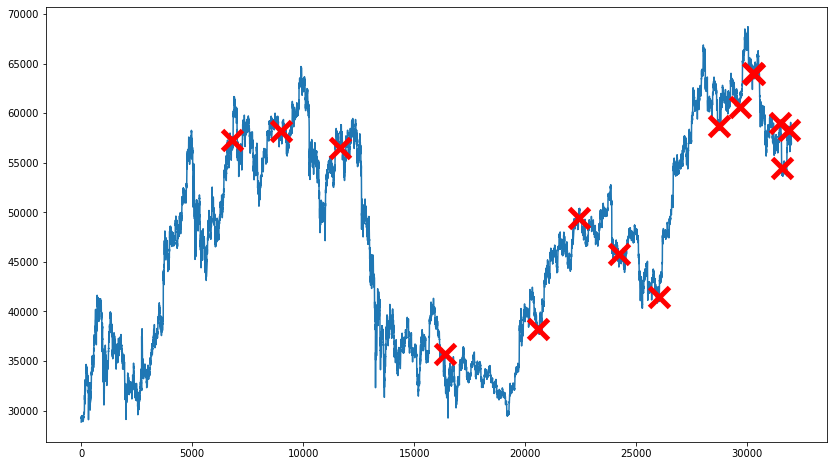

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(kline_test_df['Close'], markevery=[i for i in minmax], marker = 'x', markersize  = 20,  markeredgecolor = 'red', markeredgewidth = 5, label='points')

In [ ]:
for col in df.columns:
  print(col)

In [ ]:
df['title'][0]

'I want some help'

In [ ]:
df['selftext']

In [ ]:
df['created_utc']